In [3]:
import pandas as pd
import numpy as np
import plotnine as p9

In [4]:
df = pd.read_csv("/Users/deeppatel/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Yale/Courses/Fall_2024/CBB574/data/GSE174083_Normalized_READ_COUNTS_limma_batch_Corrected.csv")

In [5]:
df.head()

,Unnamed: 0,1001_T1_S353_L008_R1_001_fastq_gz_read_counts_txt,1001_T2_S3_L001_R1_001_fastq_gz_read_counts_txt,1001_T3_S29_L001_R1_001_fastq_gz_read_counts_txt,1001_T4_S344_L008_R1_001_fastq_gz_read_counts_txt,1003_T1_S101_L002_R1_001_fastq_gz_read_counts_txt,1003_T2_S121_L002_R1_001_fastq_gz_read_counts_txt,1003_T3_S103_L002_R1_001_fastq_gz_read_counts_txt,1003_T4_S109_L002_R1_001_fastq_gz_read_counts_txt,1004_T1_S40_L001_R1_001_fastq_gz_read_counts_txt,...,H03_S24_L001_R1_001_fastq_gz_read_counts_txt,H04_S32_L001_R1_001_fastq_gz_read_counts_txt,H05_S40_L001_R1_001_fastq_gz_read_counts_txt,H06_S48_L001_R1_001_fastq_gz_read_counts_txt,H07_S56_L001_R1_001_fastq_gz_read_counts_txt,H08_S64_L001_R1_001_fastq_gz_read_counts_txt,H09_S72_L001_R1_001_fastq_gz_read_counts_txt,H10_S80_L001_R1_001_fastq_gz_read_counts_txt,H11_S88_L001_R1_001_fastq_gz_read_counts_txt,H12_S96_L001_R1_001_fastq_gz_read_counts_txt
0,ENSG00000000003,4.486827,4.486827,4.486827,4.486827,4.430585,4.430585,4.430585,4.430585,4.430585,...,4.492085,4.492085,4.492085,4.492085,4.492085,4.492085,5.026669,4.492085,4.492085,4.492085
1,ENSG00000000419,4.667911,4.365893,4.365893,5.845810,5.896482,4.880599,4.464524,4.464524,5.510194,...,4.736807,4.736807,4.736807,4.736807,4.736807,4.736807,4.736807,4.736807,4.736807,4.736807
2,ENSG00000000457,5.544566,4.299838,5.988852,5.390159,4.549511,5.765730,4.549511,4.549511,6.439225,...,5.035134,5.035134,5.035134,5.035134,5.875261,6.132623,5.303570,5.035134,5.412321,6.464144
3,ENSG00000000460,4.800112,4.373767,5.540556,5.323409,4.560949,4.560949,4.560949,4.560949,4.560949,...,4.584687,4.584687,4.584687,4.584687,4.584687,4.584687,4.963769,4.584687,4.584687,4.584687
4,ENSG00000000938,7.609275,5.848698,7.996832,7.135918,7.617388,7.709303,8.398496,7.651188,8.625044,...,9.167889,8.791773,7.481140,7.164388,6.912436,8.406363,8.820425,7.810794,8.285124,7.967223


In [31]:
samples = [1123,1124,1133,1131,1127]

In [32]:
#check whether the columns of the dataframe are the same as the samples and filter the data
columns_list = df.columns.tolist()
filtered_columns = ['Unnamed: 0']

for i in range(len(columns_list)):
    for sample in samples:
        if str(sample) in columns_list[i]:
            filtered_columns.append(columns_list[i])

In [33]:
df_filtered = df[filtered_columns]  

In [34]:
df_filtered.to_csv("filtered_5sample.csv", index=False)

In [91]:
df_main = pd.DataFrame(columns=[])

In [75]:
#Filter the columns which have T4 in the name
columns_list = df.columns.tolist()
filtered_columns = ['Unnamed: 0']

for i in range(len(columns_list)):
    if 'T4' in columns_list[i]:
        filtered_columns.append(columns_list[i])

df_filtered_T4 = df[filtered_columns]

In [76]:
#find transpose of the dataframe
df_filtered_T4_transposed = df_filtered_T4.T


In [78]:
df_filtered_T4_transposed.columns = df_filtered_T4_transposed.iloc[0]
df_filtered_T4_transposed = df_filtered_T4_transposed.drop(df_filtered_T4_transposed.index[0])

In [107]:
# PCA analysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaler.fit(df_filtered_T4_transposed)
scaled_data = scaler.transform(df_filtered_T4_transposed)

# PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

# Plot the PCA
pca_df = pd.DataFrame(x_pca, columns=['PC1', 'PC2'])

In [108]:
pca_df.index = df_filtered_T4_transposed.index

#do kmeans clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(pca_df)
pca_df['cluster'] = kmeans.labels_

In [110]:
samples = []
for i in range(0, len(pca_df)):
    samples.append(pca_df.index[i][0:4])

# df_main['samples'] = samples
df_main['T4_cluster'] = pca_df['cluster']

In [114]:
df_main['T4_cluster'] = pca_df['cluster'].tolist()

/var/folders/f3/b6p9hb4s1796fx3xwg65bg_r0000gn/T/ipykernel_42163/759609458.py:3: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


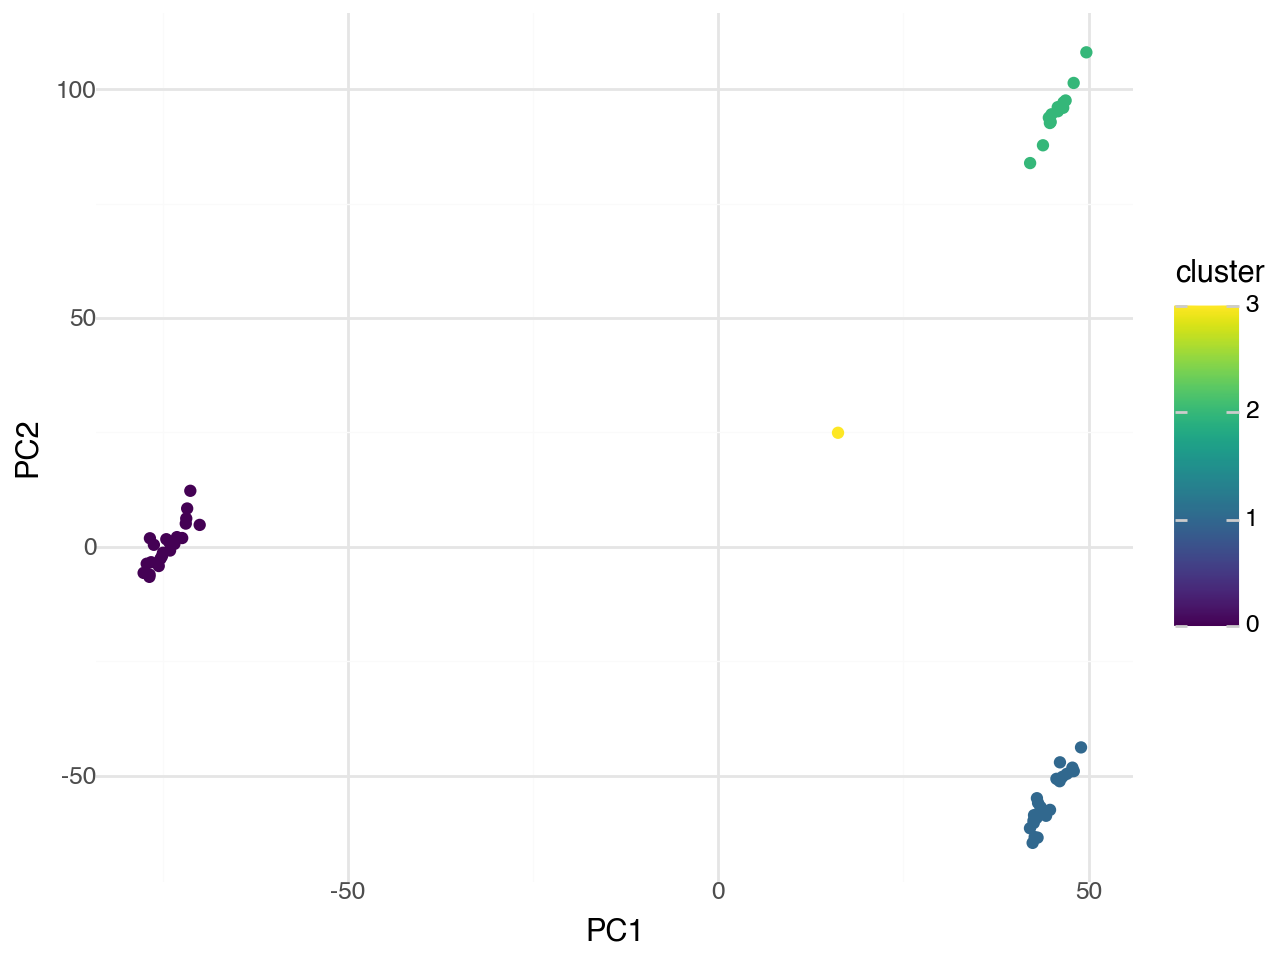

In [90]:
#plot the PCA
plot = p9.ggplot(pca_df, p9.aes(x='PC1', y='PC2', color='cluster')) + p9.geom_point() + p9.theme_minimal()
print(plot)

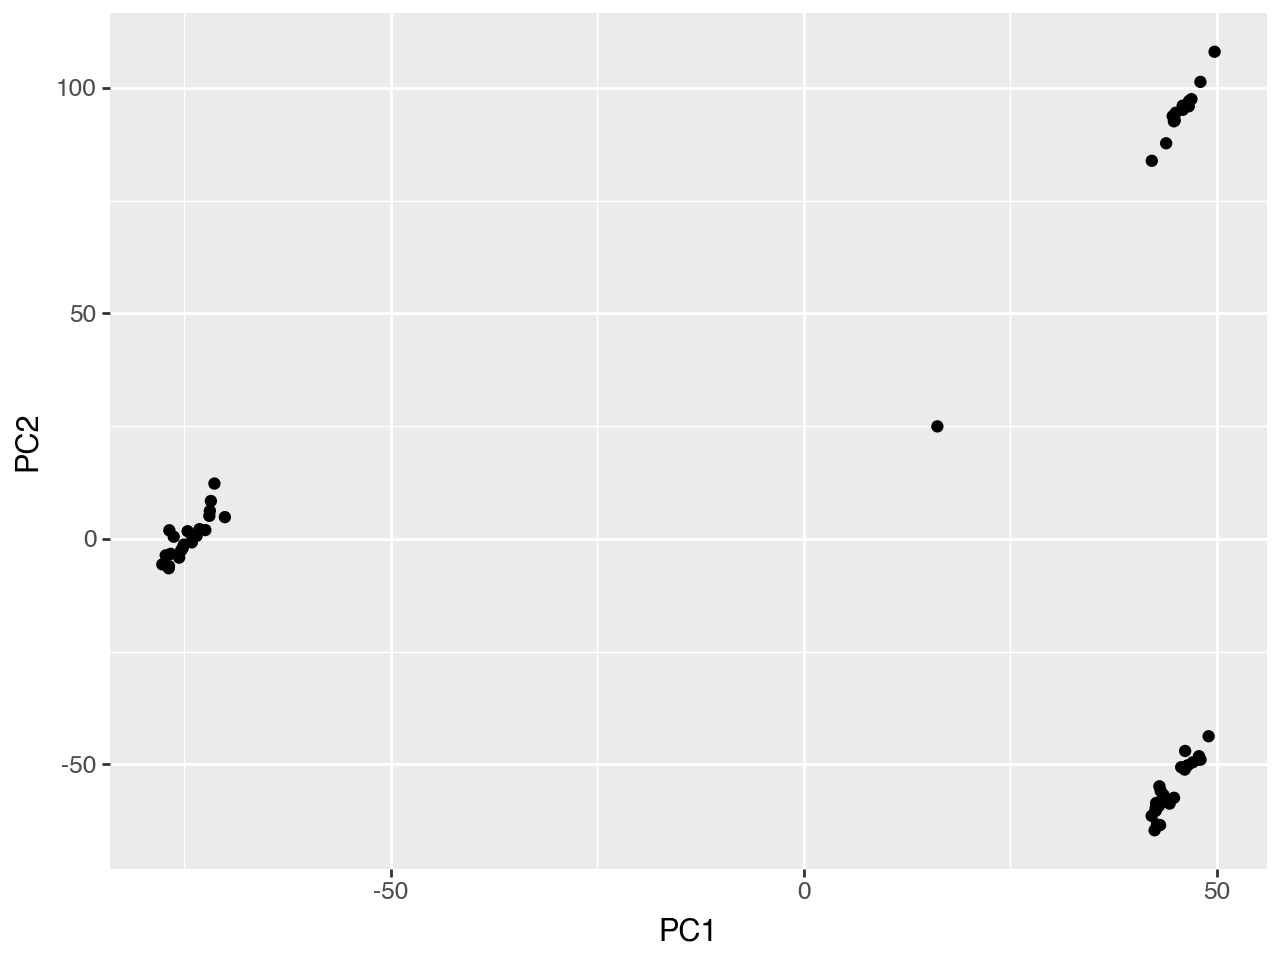

In [81]:
#plotting the PCA
p9.ggplot(pca_df, p9.aes(x='PC1', y='PC2')) + p9.geom_point()


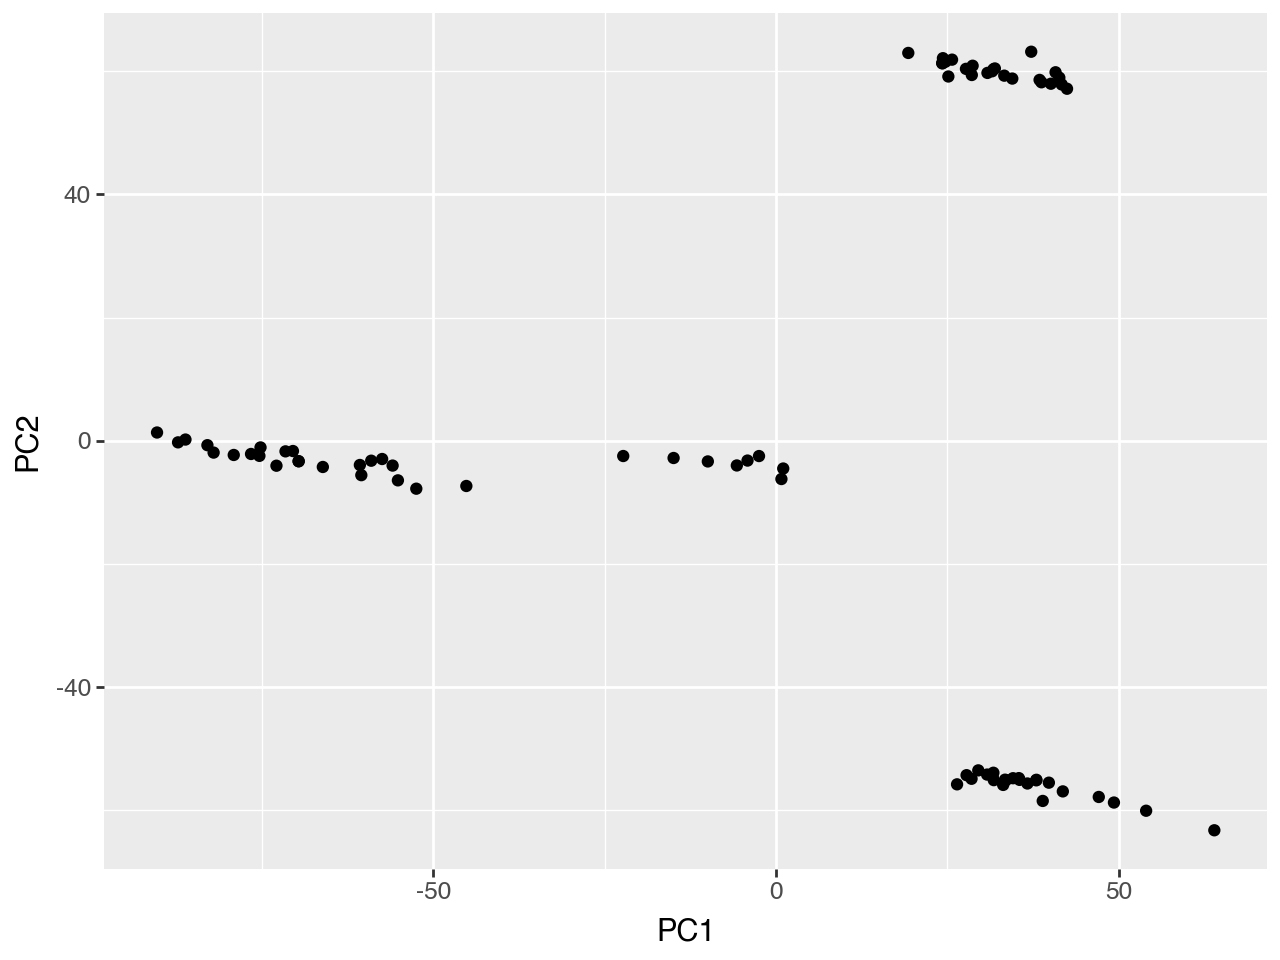

In [99]:
#Do the same for T3
columns_list = df.columns.tolist()
filtered_columns = ['Unnamed: 0']

for i in range(len(columns_list)):
    if 'T3' in columns_list[i]:
        filtered_columns.append(columns_list[i])


df_filtered_T3 = df[filtered_columns]

#find transpose of the dataframe
df_filtered_T3_transposed = df_filtered_T3.T

df_filtered_T3_transposed.columns = df_filtered_T3_transposed.iloc[0]
df_filtered_T3_transposed = df_filtered_T3_transposed.drop(df_filtered_T3_transposed.index[0])

# Standardize the data
scaler = StandardScaler()
scaler.fit(df_filtered_T3_transposed)
scaled_data = scaler.transform(df_filtered_T3_transposed)

# PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

# Plot the PCA
pca_df = pd.DataFrame(x_pca, columns=['PC1', 'PC2'])

#plotting the PCA
p9.ggplot(pca_df, p9.aes(x='PC1', y='PC2')) + p9.geom_point()


/var/folders/f3/b6p9hb4s1796fx3xwg65bg_r0000gn/T/ipykernel_42163/369415919.py:12: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


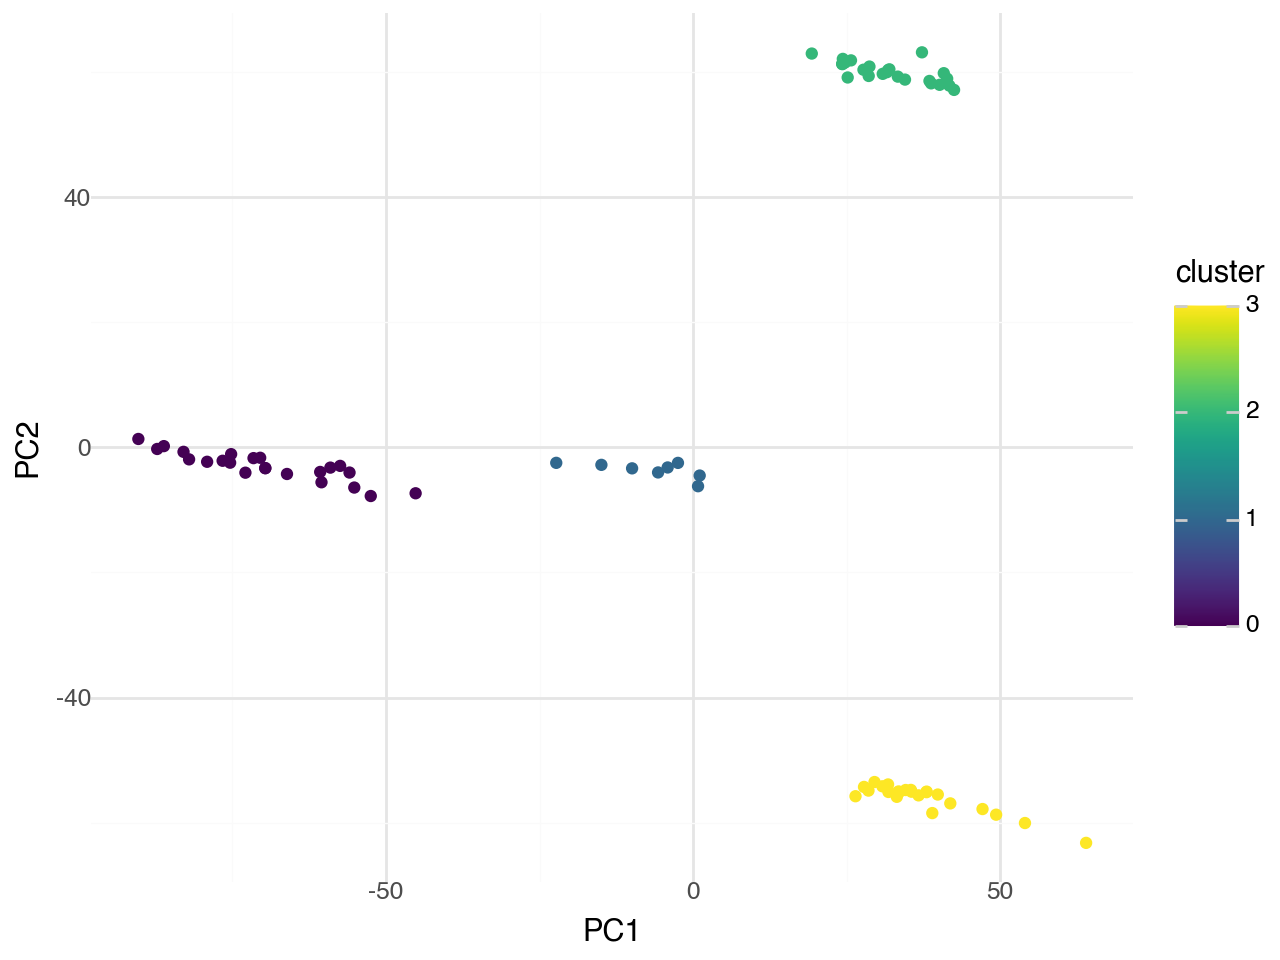

In [101]:
pca_df.index = df_filtered_T3_transposed.index

#do kmeans clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(pca_df)
pca_df['cluster'] = kmeans.labels_

#plot the PCA
plot = p9.ggplot(pca_df, p9.aes(x='PC1', y='PC2', color='cluster')) + p9.geom_point() + p9.theme_minimal()
print(plot)

In [104]:
samples = []
for i in range(0, len(pca_df)):
    samples.append(pca_df.index[i][0:4])

pca_df.index = samples

df_main['T3_cluster'] = pca_df['cluster']
for i in range(len(df_main)):
    if df_main['samples'][i] in samples:
        df_main['T3_cluster'][i] = pca_df.loc[df_main['samples'][i]]['cluster']
    else:
        df_main['T3_cluster'][i] = -1
        

/var/folders/f3/b6p9hb4s1796fx3xwg65bg_r0000gn/T/ipykernel_42163/2475120016.py:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/f3/b6p9hb4s1796fx3xwg65bg_r0000gn/T/ipykernel_42163/2475120016.py:10: SettingWithCopyWarning: 
A valu

In [115]:
df_main

,samples,T4_cluster,T3_cluster
0,1001,2,2.0
1,1003,0,0.0
2,1011,1,3.0
3,1012,0,0.0
4,1013,1,3.0
5,1014,0,0.0
6,1015,1,3.0
7,1016,1,3.0
8,1017,2,2.0
9,1019,3,3.0


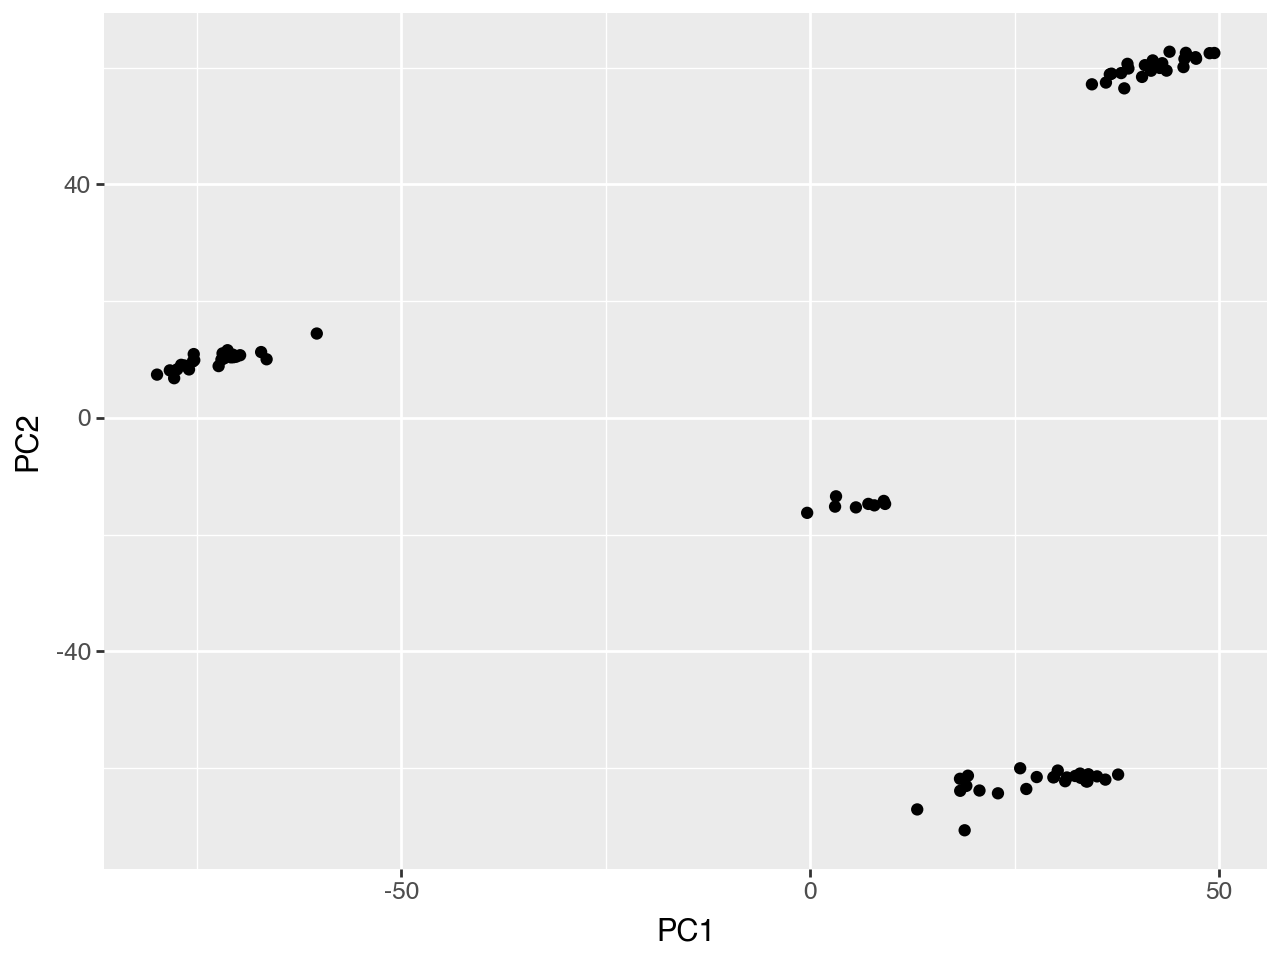

In [117]:
#Do the same for T3
columns_list = df.columns.tolist()
filtered_columns = ['Unnamed: 0']

for i in range(len(columns_list)):
    if 'T2' in columns_list[i]:
        filtered_columns.append(columns_list[i])


df_filtered_T3 = df[filtered_columns]

#find transpose of the dataframe
df_filtered_T3_transposed = df_filtered_T3.T

df_filtered_T3_transposed.columns = df_filtered_T3_transposed.iloc[0]
df_filtered_T3_transposed = df_filtered_T3_transposed.drop(df_filtered_T3_transposed.index[0])

# Standardize the data
scaler = StandardScaler()
scaler.fit(df_filtered_T3_transposed)
scaled_data = scaler.transform(df_filtered_T3_transposed)

# PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

# Plot the PCA
pca_df = pd.DataFrame(x_pca, columns=['PC1', 'PC2'])

#plotting the PCA
p9.ggplot(pca_df, p9.aes(x='PC1', y='PC2')) + p9.geom_point()


In [119]:
pca_df.index = df_filtered_T3_transposed.index

#do kmeans clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(pca_df)
pca_df['cluster'] = kmeans.labels_


samples = []
for i in range(0, len(pca_df)):
    samples.append(pca_df.index[i][0:4])

pca_df.index = samples

for i in range(len(df_main)):
    if df_main['samples'][i] in samples:
        df_main['T2_cluster'][i] = pca_df.loc[df_main['samples'][i]]['cluster']
    else:
        df_main['T2_cluster'][i] = -1

df_main

/var/folders/f3/b6p9hb4s1796fx3xwg65bg_r0000gn/T/ipykernel_42163/3495799477.py:19: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/f3/b6p9hb4s1796fx3xwg65bg_r0000gn/T/ipykernel_42163/3495799477.py:19: SettingWithCopyWarning: 
A valu

,samples,T4_cluster,T3_cluster,T2_cluster
0,1001,2,2.0,1.0
1,1003,0,0.0,0.0
2,1011,1,3.0,2.0
3,1012,0,0.0,3.0
4,1013,1,3.0,2.0
5,1014,0,0.0,0.0
6,1015,1,3.0,2.0
7,1016,1,3.0,2.0
8,1017,2,2.0,1.0
9,1019,3,3.0,2.0


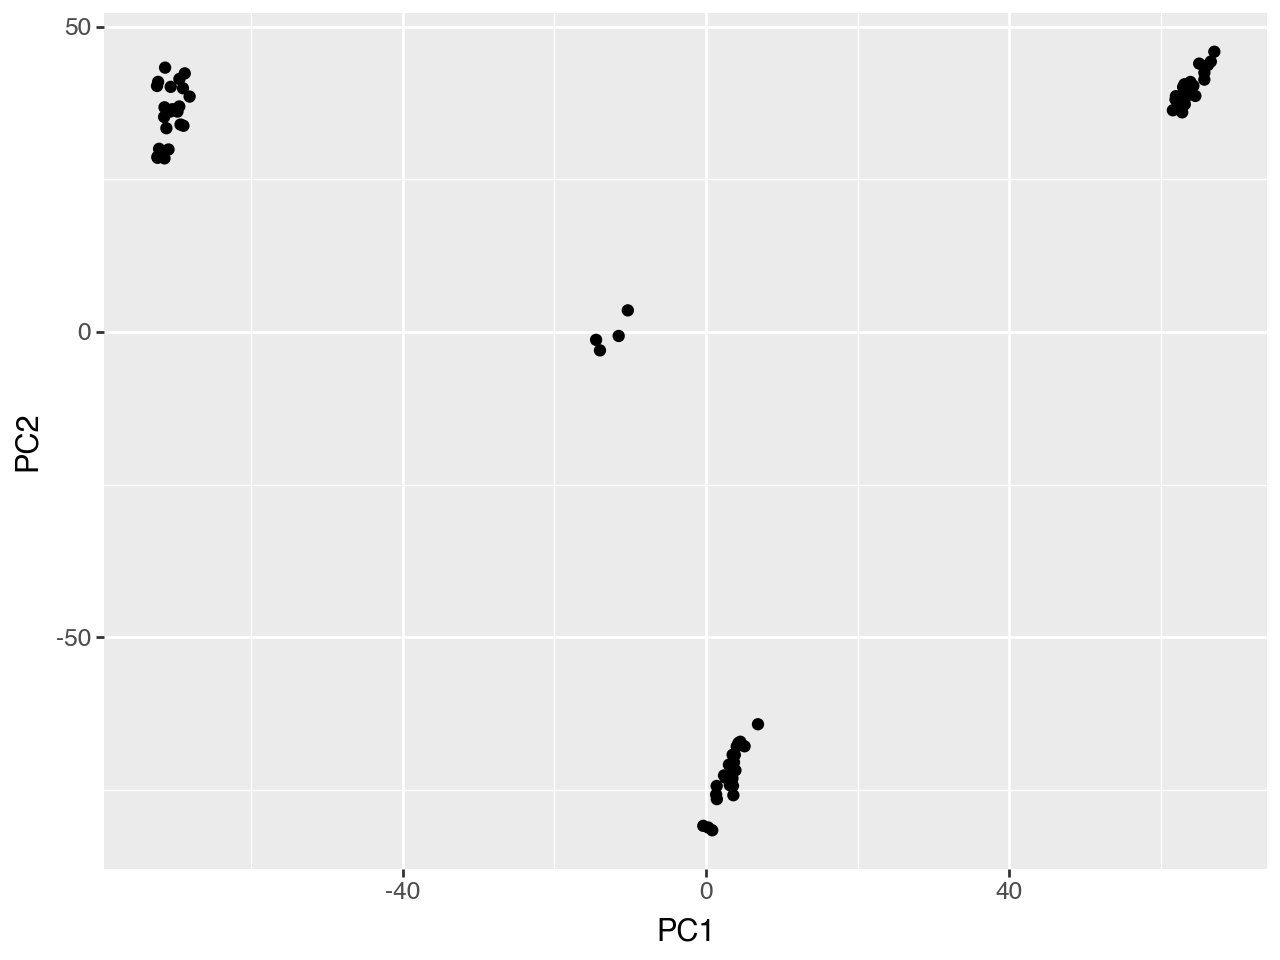

In [120]:
#Do the same for T3
columns_list = df.columns.tolist()
filtered_columns = ['Unnamed: 0']

for i in range(len(columns_list)):
    if 'T1' in columns_list[i]:
        filtered_columns.append(columns_list[i])


df_filtered_T3 = df[filtered_columns]

#find transpose of the dataframe
df_filtered_T3_transposed = df_filtered_T3.T

df_filtered_T3_transposed.columns = df_filtered_T3_transposed.iloc[0]
df_filtered_T3_transposed = df_filtered_T3_transposed.drop(df_filtered_T3_transposed.index[0])

# Standardize the data
scaler = StandardScaler()
scaler.fit(df_filtered_T3_transposed)
scaled_data = scaler.transform(df_filtered_T3_transposed)

# PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

# Plot the PCA
pca_df = pd.DataFrame(x_pca, columns=['PC1', 'PC2'])

#plotting the PCA
p9.ggplot(pca_df, p9.aes(x='PC1', y='PC2')) + p9.geom_point()


In [123]:
pca_df.index = df_filtered_T3_transposed.index

#do kmeans clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(pca_df)
pca_df['cluster'] = kmeans.labels_

samples = []
for i in range(0, len(pca_df)):
    samples.append(pca_df.index[i][0:4])

pca_df.index = samples
df_main['T1_cluster'] = [-1]*len(df_main)

for i in range(len(df_main)):
    if df_main['samples'][i] in samples:
        df_main['T1_cluster'][i] = pca_df.loc[df_main['samples'][i]]['cluster']
    else:
        df_main['T1_cluster'][i] = -1

df_main

/var/folders/f3/b6p9hb4s1796fx3xwg65bg_r0000gn/T/ipykernel_42163/1798170922.py:19: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/f3/b6p9hb4s1796fx3xwg65bg_r0000gn/T/ipykernel_42163/1798170922.py:19: SettingWithCopyWarning: 
A valu

,samples,T4_cluster,T3_cluster,T2_cluster,T1_cluster
0,1001,2,2.0,1.0,0
1,1003,0,0.0,0.0,1
2,1011,1,3.0,2.0,2
3,1012,0,0.0,3.0,3
4,1013,1,3.0,2.0,2
5,1014,0,0.0,0.0,1
6,1015,1,3.0,2.0,2
7,1016,1,3.0,2.0,2
8,1017,2,2.0,1.0,0
9,1019,3,3.0,2.0,2


In [131]:
# Prepare the data for the Sankey diagram
flows = []
time_points = ["T1_cluster", "T2_cluster", "T3_cluster", "T4_cluster"]

for i in range(len(time_points) - 1):
    source = time_points[i]
    target = time_points[i + 1]
    # Group by source and target clusters
    flow = df_main.groupby([source, target]).size().reset_index(name="value")
    flow.columns = ["source", "target", "value"]
    flow["source"] = flow["source"].astype(str) + f" ({source})"
    flow["target"] = flow["target"].astype(str) + f" ({target})"
    flows.append(flow)

# Combine all flows
all_flows = pd.concat(flows)

# Create unique labels for the nodes
labels = list(pd.concat([all_flows["source"], all_flows["target"]]).unique())

# Map labels to indices for Sankey diagram
label_to_index = {label: i for i, label in enumerate(labels)}
all_flows["source_index"] = all_flows["source"].map(label_to_index)
all_flows["target_index"] = all_flows["target"].map(label_to_index)

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
    ),
    link=dict(
        source=all_flows["source_index"],
        target=all_flows["target_index"],
        value=all_flows["value"],
    )
)])

fig.update_layout(title_text="Sankey Diagram of Cluster Transitions", font_size=10)
fig.show()